In [85]:
import pandas as pd
# import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [86]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report,f1_score,confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [87]:
data=pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Online-Shoppers-Purchasing-Intention/master/online_shoppers_intention.csv')
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [89]:
data[['Revenue',"Weekend","TrafficType","Region","Browser","OperatingSystems","SpecialDay"]]=data[['Revenue',"Weekend","TrafficType","Region","Browser","OperatingSystems","SpecialDay"]].astype(str)
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  object 
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

In [91]:
data['Revenue']=data['Revenue'].map({'True':1,'False':0}).astype(int)
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,0


In [92]:
df1= data[['Administrative_Duration', 'BounceRates']]

In [93]:
data.iloc[:,1:6]

,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,0.0,0,0.0,1,0.000000
1,0.0,0,0.0,2,64.000000
2,0.0,0,0.0,1,0.000000
3,0.0,0,0.0,2,2.666667
4,0.0,0,0.0,10,627.500000
...,...,...,...,...,...
12325,145.0,0,0.0,53,1783.791667
12326,0.0,0,0.0,5,465.750000
12327,0.0,0,0.0,6,184.250000
12328,75.0,0,0.0,15,346.000000


In [94]:
x = data.iloc[:, [1, 6]].values
x.shape

(12330, 2)

In [95]:
# Clustering to understand the grouping of the features

wss= []

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df1)
    labels= km.labels_
    print(labels)
    wss.append(km.inertia_)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 4 0]
[0 0 0 ... 0 2 0]
[6 6 6 ... 6 0 6]
[2 2 2 ... 2 6 2]
[4 4 4 ... 4 1 4]


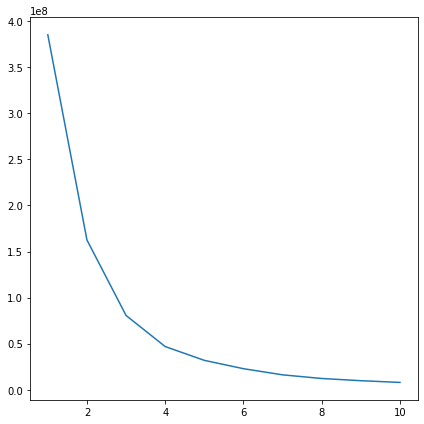

In [96]:
plt.plot(range(1,11),wss)
plt.rcParams['figure.figsize'] = (15, 7)
plt.tight_layout()
plt.show()

In [97]:
model= KMeans(n_clusters=3)
y_means= model.fit_predict(x)

In [98]:
model.cluster_centers_[:,0]

array([  29.50203285,  309.8625651 , 1188.18781029])

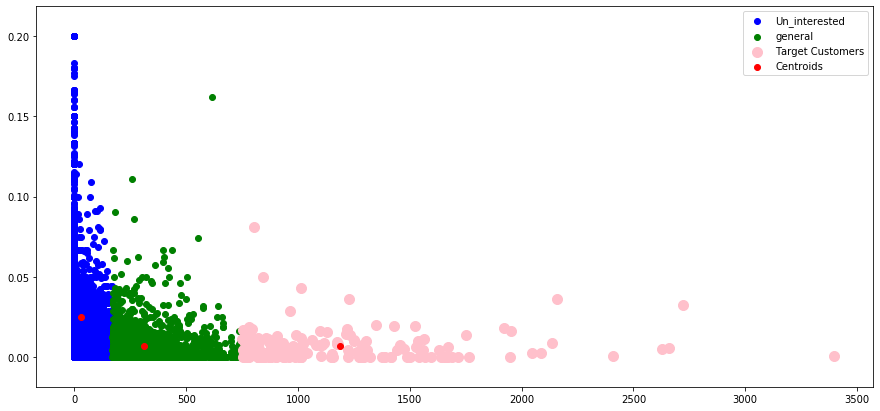

In [99]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],color='b',label="Un_interested")
plt.scatter(x[y_means==1,0],x[y_means==1,1],color='g',label="general")
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'pink', label = 'Target Customers')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='r',label="Centroids")
plt.legend()
plt.show()

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  object 
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

### Getting dummies

In [101]:
cs = [i for i in data.columns if data[i].dtype == 'object']
df = pd.get_dummies(data,columns =cs,drop_first=True)

In [102]:
# For the processing we create a copy of the dummies
df1= df.copy(deep=True)

In [103]:
X=df1.drop('Revenue',1)
y=df1['Revenue']

In [104]:
df1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue,...,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0,...,0,0,0,0,0,0,0,0,1,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0,...,0,0,0,0,0,1,0,0,1,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0,...,0,0,0,0,0,0,0,0,1,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0,...,0,0,0,0,0,0,0,0,1,0


### train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.3, random_state = 0,stratify= y)

# checking the shapes

print("Shape of x_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 72)
Shape of y_train : (8631,)
Shape of x_test : (3699, 72)
Shape of y_test : (3699,)


In [106]:
print("Train" ,y_train.value_counts(normalize=True))
print("-----------------------------------")
print("Test" ,y_test.value_counts(normalize=True))

# Both have been split in an equal ratio of percentage

Train 0    0.845209
1    0.154791
Name: Revenue, dtype: float64
-----------------------------------
Test 0    0.845364
1    0.154636
Name: Revenue, dtype: float64


## Testing the performance of the model without elimination

### RandomForestClassifier

In [107]:
#Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.9007839956745066
f1 score tested: 0.6188992731048807
[[3034   93]
 [ 274  298]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3127
           1       0.76      0.52      0.62       572

    accuracy                           0.90      3699
   macro avg       0.84      0.75      0.78      3699
weighted avg       0.89      0.90      0.89      3699



In [108]:
# Logistic Regression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,y_pred))


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.8801992816591356
Testing Accuracy : 0.8888888888888888
f1 score tested: 0.5204200700116687
[[3065   62]
 [ 349  223]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3127
           1       0.78      0.39      0.52       572

    accuracy                           0.89      3699
   macro avg       0.84      0.69      0.73      3699
weighted avg       0.88      0.89      0.87      3699



In [109]:
# Decision Tree

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,y_pred))


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8615842119491754
f1 score tested: 0.5570934256055363
[[2865  262]
 [ 250  322]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3127
           1       0.55      0.56      0.56       572

    accuracy                           0.86      3699
   macro avg       0.74      0.74      0.74      3699
weighted avg       0.86      0.86      0.86      3699



### KNN- Scaling the features

In [110]:
from sklearn.preprocessing import StandardScaler,RobustScaler

In [111]:
X=df1.drop('Revenue',1)
y=df1['Revenue']

In [112]:
sc=RobustScaler()
X_sc= sc.fit_transform(X)

In [113]:
X_train, X_test, y_train, y_test = train_test_split (X_sc,y,test_size=0.3, random_state = 0,stratify= y)

In [114]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,y_pred))


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.9128722048430078
Testing Accuracy : 0.8821303054879697
f1 score tested: 0.5648702594810379
[[2980  147]
 [ 289  283]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3127
           1       0.66      0.49      0.56       572

    accuracy                           0.88      3699
   macro avg       0.78      0.72      0.75      3699
weighted avg       0.87      0.88      0.88      3699



In [115]:
# AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,y_pred))


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.8932916232186305
Testing Accuracy : 0.8907812922411462
f1 score tested: 0.6107899807321772
[[2978  149]
 [ 255  317]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3127
           1       0.68      0.55      0.61       572

    accuracy                           0.89      3699
   macro avg       0.80      0.75      0.77      3699
weighted avg       0.88      0.89      0.89      3699



In [116]:
# GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,y_pred))


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.9212142277835709
Testing Accuracy : 0.9018653690186537
f1 score tested: 0.6451612903225806
[[3006  121]
 [ 242  330]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3127
           1       0.73      0.58      0.65       572

    accuracy                           0.90      3699
   macro avg       0.83      0.77      0.79      3699
weighted avg       0.90      0.90      0.90      3699



### Validating the bias_variance error

In [117]:
LR=LogisticRegression()
KNN=KNeighborsClassifier()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
AB=AdaBoostClassifier()
GB=GradientBoostingClassifier()

In [118]:
models = []
models.append(('Logistic', LR))
models.append(('KNN',KNN))
models.append(('DecisionTree',DT))
models.append(('RandomForest',RF))
models.append(('AdaBoost',AB))
models.append(('GBoost',GB))

Logistic: 0.491418 (0.000148)
KNN: 0.413108 (0.000131)
DecisionTree: 0.452311 (0.000175)
RandomForest: 0.373984 (0.000000)
AdaBoost: 0.401740 (0.000031)
GBoost: 0.337299 (0.000004)


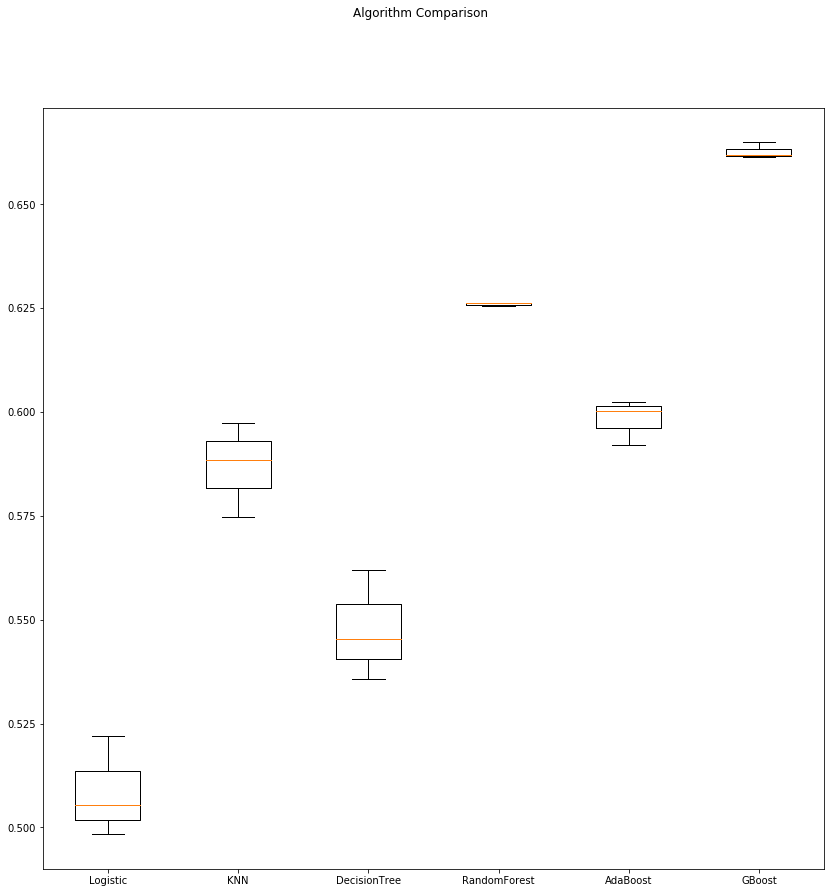

In [119]:
# evaluate each model in turn
plt.rcParams["figure.figsize"]=(14,14)
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_sc, y,cv=kfold, scoring='f1')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, 1-np.mean(cv_results),np.var(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Backward Elimination

In [120]:
import statsmodels.api as sm
X_1 = sm.add_constant(X)
model = sm.OLS(y,X_1).fit()
model.pvalues

const                            2.472121e-12
Administrative                   1.696370e-01
Administrative_Duration          5.147291e-01
Informational                    3.384350e-01
Informational_Duration           6.356868e-01
                                     ...     
TrafficType_8                    5.680675e-04
TrafficType_9                    7.885046e-01
VisitorType_Other                1.452356e-01
VisitorType_Returning_Visitor    2.047971e-04
Weekend_True                     2.985786e-01
Length: 73, dtype: float64

In [121]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Month_Dec', 'Month_Feb', 'Month_Mar', 'Month_May', 'Month_Nov', 'OperatingSystems_2', 'Browser_12', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13', 'TrafficType_2', 'TrafficType_20', 'TrafficType_5', 'TrafficType_8', 'VisitorType_Other', 'VisitorType_Returning_Visitor']


### Selecting the features from the backward elimination

In [122]:
selected_features_BE.append("Revenue")

In [123]:
df= df[selected_features_BE]

In [124]:
df.columns

Index(['ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'Month_Dec', 'Month_Feb', 'Month_Mar', 'Month_May',
       'Month_Nov', 'OperatingSystems_2', 'Browser_12', 'TrafficType_10',
       'TrafficType_11', 'TrafficType_13', 'TrafficType_2', 'TrafficType_20',
       'TrafficType_5', 'TrafficType_8', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Revenue'],
      dtype='object')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ProductRelated                 12330 non-null  int64  
 1   ProductRelated_Duration        12330 non-null  float64
 2   BounceRates                    12330 non-null  float64
 3   ExitRates                      12330 non-null  float64
 4   PageValues                     12330 non-null  float64
 5   Month_Dec                      12330 non-null  uint8  
 6   Month_Feb                      12330 non-null  uint8  
 7   Month_Mar                      12330 non-null  uint8  
 8   Month_May                      12330 non-null  uint8  
 9   Month_Nov                      12330 non-null  uint8  
 10  OperatingSystems_2             12330 non-null  uint8  
 11  Browser_12                     12330 non-null  uint8  
 12  TrafficType_10                 12330 non-null 

In [126]:
X=df.drop(['Revenue'],axis=1)
y=df['Revenue']

In [127]:
y

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12330, dtype: int32

In [128]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.3, random_state = 0,stratify= y)

# checking the shapes

print("Shape of x_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 21)
Shape of y_train : (8631,)
Shape of x_test : (3699, 21)
Shape of y_test : (3699,)


In [129]:
# LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.8844861545591473
Testing Accuracy : 0.8875371722087051
f1 score tested: 0.5128805620608899
[[3064   63]
 [ 353  219]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3127
           1       0.78      0.38      0.51       572

    accuracy                           0.89      3699
   macro avg       0.84      0.68      0.72      3699
weighted avg       0.88      0.89      0.87      3699



In [130]:
# Scaling the features for the KNN_Model
sc=RobustScaler()
X_sc= sc.fit_transform(X)

# train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_sc,y,test_size=0.3, random_state = 0,stratify= y)

# KNN Classifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,y_pred))


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.9177383848916696
Testing Accuracy : 0.8891592322249257
f1 score tested: 0.6065259117082533
[[2973  154]
 [ 256  316]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3127
           1       0.67      0.55      0.61       572

    accuracy                           0.89      3699
   macro avg       0.80      0.75      0.77      3699
weighted avg       0.88      0.89      0.88      3699



In [131]:
# RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.9998841385702699
Testing Accuracy : 0.8980805623141389
f1 score tested: 0.6293018682399213
[[3002  125]
 [ 252  320]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3127
           1       0.72      0.56      0.63       572

    accuracy                           0.90      3699
   macro avg       0.82      0.76      0.79      3699
weighted avg       0.89      0.90      0.89      3699



In [132]:
# DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.9998841385702699
Testing Accuracy : 0.8613138686131386
f1 score tested: 0.5543006081668116
[[2867  260]
 [ 253  319]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3127
           1       0.55      0.56      0.55       572

    accuracy                           0.86      3699
   macro avg       0.73      0.74      0.74      3699
weighted avg       0.86      0.86      0.86      3699



In [133]:
# AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,y_pred))


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.8952612675240412
Testing Accuracy : 0.8915923222492566
f1 score tested: 0.6155321188878236
[[2977  150]
 [ 251  321]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3127
           1       0.68      0.56      0.62       572

    accuracy                           0.89      3699
   macro avg       0.80      0.76      0.78      3699
weighted avg       0.89      0.89      0.89      3699



In [134]:
# GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,y_pred))


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.9178542463213996
Testing Accuracy : 0.9013246823465801
f1 score tested: 0.6411012782694199
[[3008  119]
 [ 246  326]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3127
           1       0.73      0.57      0.64       572

    accuracy                           0.90      3699
   macro avg       0.83      0.77      0.79      3699
weighted avg       0.89      0.90      0.90      3699



### Validating the bias_variance error

In [135]:
LR=LogisticRegression()
KNN=KNeighborsClassifier()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
AB=AdaBoostClassifier()
GB=GradientBoostingClassifier()

In [136]:
models = []
models.append(('Logistic', LR))
models.append(('KNN',KNN))
models.append(('DecisionTree',DT))
models.append(('RandomForest',RF))
models.append(('AdaBoost',AB))
models.append(('GBoost',GB))

Logistic: 0.488066 (0.000326)
KNN: 0.395042 (0.000036)
DecisionTree: 0.444833 (0.000093)
RandomForest: 0.354577 (0.000035)
AdaBoost: 0.388293 (0.000176)
GBoost: 0.343615 (0.000219)


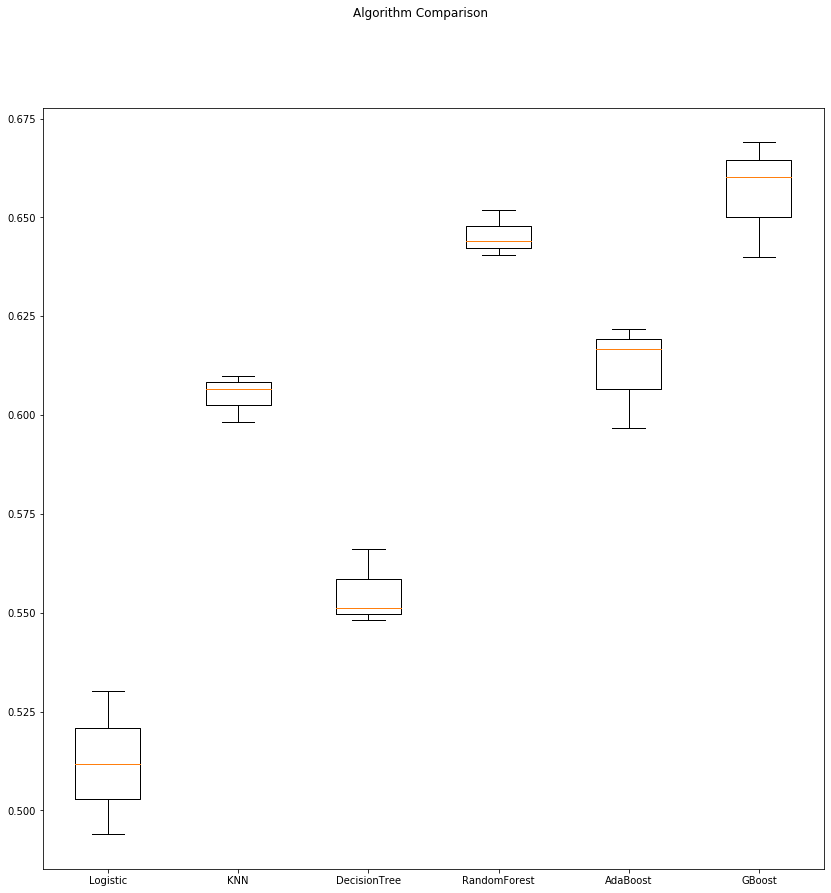

In [137]:
# evaluate each model in turn
plt.rcParams["figure.figsize"]=(14,14)
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_sc, y,cv=kfold, scoring='f1')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, 1-np.mean(cv_results),np.var(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Inference:

## Before & After Elimination



In [136]:
data["Revenue"].value_counts(normalize=True)*100

0    84.525547
1    15.474453
Name: Revenue, dtype: float64

#### Both after and before feature selection the is not much vairation in the performance in terms of accuracy 
#### Precision and Recall perform better in identifying the false statement Correctly but not the best in estimating the true

## Resampling Techniques

In [155]:
from sklearn.utils import resample

# Separate input features and target
y = df.Revenue
X = df.drop('Revenue', axis=1)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27,stratify=y)

In [157]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month_Dec,Month_Feb,Month_Mar,Month_May,Month_Nov,...,TrafficType_10,TrafficType_11,TrafficType_13,TrafficType_2,TrafficType_20,TrafficType_5,TrafficType_8,VisitorType_Other,VisitorType_Returning_Visitor,Revenue
4591,29,3229.169841,0.003226,0.033065,15.658084,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2875,19,196.500000,0.000000,0.021053,0.000000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
11301,76,3580.333333,0.004819,0.020522,12.207801,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
28,4,63.000000,0.000000,0.050000,0.000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12310,21,411.083333,0.015789,0.016140,0.000000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [158]:
# separate minority and majority classes
No_Revenue = X[X.Revenue==0]
Revenue = X[X.Revenue==1]

## Upsampling

In [159]:
# upsample minority
# pass the count of minority class and increase it to the same count of minority class
Revenue_upsampled = resample(Revenue,
                          replace=True, # sample with replacement
                          n_samples=len(No_Revenue), # match number in majority class
                          random_state=27) # reproducible results

In [160]:
# combine majority and upsampled minority
upsampled = pd.concat([No_Revenue, Revenue_upsampled])

In [161]:
# check new class counts
upsampled.Revenue.value_counts()

1    7816
0    7816
Name: Revenue, dtype: int64

In [162]:
upsampled

,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month_Dec,Month_Feb,Month_Mar,Month_May,Month_Nov,...,TrafficType_10,TrafficType_11,TrafficType_13,TrafficType_2,TrafficType_20,TrafficType_5,TrafficType_8,VisitorType_Other,VisitorType_Returning_Visitor,Revenue
2875,19,196.500000,0.000000,0.021053,0.000000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
11301,76,3580.333333,0.004819,0.020522,12.207801,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
28,4,63.000000,0.000000,0.050000,0.000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12310,21,411.083333,0.015789,0.016140,0.000000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5944,4,141.000000,0.000000,0.050000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12095,137,5588.185426,0.000729,0.026320,6.898232,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
4160,8,667.666667,0.000000,0.018182,56.623636,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
4447,8,459.000000,0.000000,0.028571,26.980000,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
6679,3,58.600000,0.000000,0.050000,113.323861,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


In [145]:
y_train = upsampled.Revenue
X_train = upsampled.drop('Revenue', axis=1)

In [179]:
# Logistic Regression
upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

# evaluating the model
print("Training Accuracy :", upsampled.score(X_train, y_train))
print("Testing Accuracy :", upsampled.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,upsampled_pred))

# confusion matrix
cm = confusion_matrix(y_test, upsampled_pred)
print(cm)

# classification report
cr = classification_report(y_test, upsampled_pred)
print(cr)

Training Accuracy : 0.8850437979885368
Testing Accuracy : 0.8851767758676614
f1 score tested: 0.5110497237569059
[[2544   62]
 [ 292  185]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      2606
           1       0.75      0.39      0.51       477

    accuracy                           0.89      3083
   macro avg       0.82      0.68      0.72      3083
weighted avg       0.87      0.89      0.87      3083



In [180]:
# Random Forest Classifier

upsampled = RandomForestClassifier().fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

# evaluating the model
print("Training Accuracy :", upsampled.score(X_train, y_train))
print("Testing Accuracy :", upsampled.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,upsampled_pred))

# confusion matrix
cm = confusion_matrix(y_test, upsampled_pred)
print(cm)

# classification report
cr = classification_report(y_test, upsampled_pred)
print(cr)

Training Accuracy : 0.9998918568184276
Testing Accuracy : 0.8991242296464482
f1 score tested: 0.648587570621469
[[2485  121]
 [ 190  287]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2606
           1       0.70      0.60      0.65       477

    accuracy                           0.90      3083
   macro avg       0.82      0.78      0.79      3083
weighted avg       0.89      0.90      0.90      3083



In [181]:
# Decision Tree Classifier

upsampled = DecisionTreeClassifier().fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

# evaluating the model
print("Training Accuracy :", upsampled.score(X_train, y_train))
print("Testing Accuracy :", upsampled.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,upsampled_pred))

# confusion matrix
cm = confusion_matrix(y_test, upsampled_pred)
print(cm)

# classification report
cr = classification_report(y_test, upsampled_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.853065196237431
f1 score tested: 0.5554465161923455
[[2347  259]
 [ 194  283]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2606
           1       0.52      0.59      0.56       477

    accuracy                           0.85      3083
   macro avg       0.72      0.75      0.73      3083
weighted avg       0.86      0.85      0.86      3083



In [182]:
# AdaBoost Classifier

upsampled = AdaBoostClassifier().fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

# evaluating the model
print("Training Accuracy :", upsampled.score(X_train, y_train))
print("Testing Accuracy :", upsampled.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,upsampled_pred))

# confusion matrix
cm = confusion_matrix(y_test, upsampled_pred)
print(cm)

# classification report
cr = classification_report(y_test, upsampled_pred)
print(cr)

Training Accuracy : 0.8929382502433222
Testing Accuracy : 0.8936101200129744
f1 score tested: 0.6306306306306305
[[2475  131]
 [ 197  280]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2606
           1       0.68      0.59      0.63       477

    accuracy                           0.89      3083
   macro avg       0.80      0.77      0.78      3083
weighted avg       0.89      0.89      0.89      3083



In [183]:
# GradientBoosting Classifier

upsampled = GradientBoostingClassifier().fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

# evaluating the model
print("Training Accuracy :", upsampled.score(X_train, y_train))
print("Testing Accuracy :", upsampled.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,upsampled_pred))


# confusion matrix
cm = confusion_matrix(y_test, upsampled_pred)
print(cm)

# classification report
cr = classification_report(y_test, upsampled_pred)
print(cr)

Training Accuracy : 0.9157564615550989
Testing Accuracy : 0.9010703859876743
f1 score tested: 0.6614872364039955
[[2480  126]
 [ 179  298]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2606
           1       0.70      0.62      0.66       477

    accuracy                           0.90      3083
   macro avg       0.82      0.79      0.80      3083
weighted avg       0.90      0.90      0.90      3083



### Validating the bias_variance error

In [151]:
LR=LogisticRegression()
#KNN=KNeighborsClassifier()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
AB=AdaBoostClassifier()
GB=GradientBoostingClassifier()

In [152]:
models = []
models.append(('Logistic', LR))
#models.append(('KNN',KNN))
models.append(('DecisionTree',DT))
models.append(('RandomForest',RF))
models.append(('AdaBoost',AB))
models.append(('GBoost',GB))

In [176]:
# Contacting back the upsampled to find the cross_value_scores

tt= pd.concat([X_test,y_test],axis=1)
new= pd.concat([upsampled, tt], axis=0)
X=  new.drop(['Revenue'],1)
y=  new['Revenue']


Logistic: 0.225136 (0.000002)
DecisionTree: 0.075133 (0.000017)
RandomForest: 0.055340 (0.000009)
AdaBoost: 0.173234 (0.000004)
GBoost: 0.149531 (0.000009)


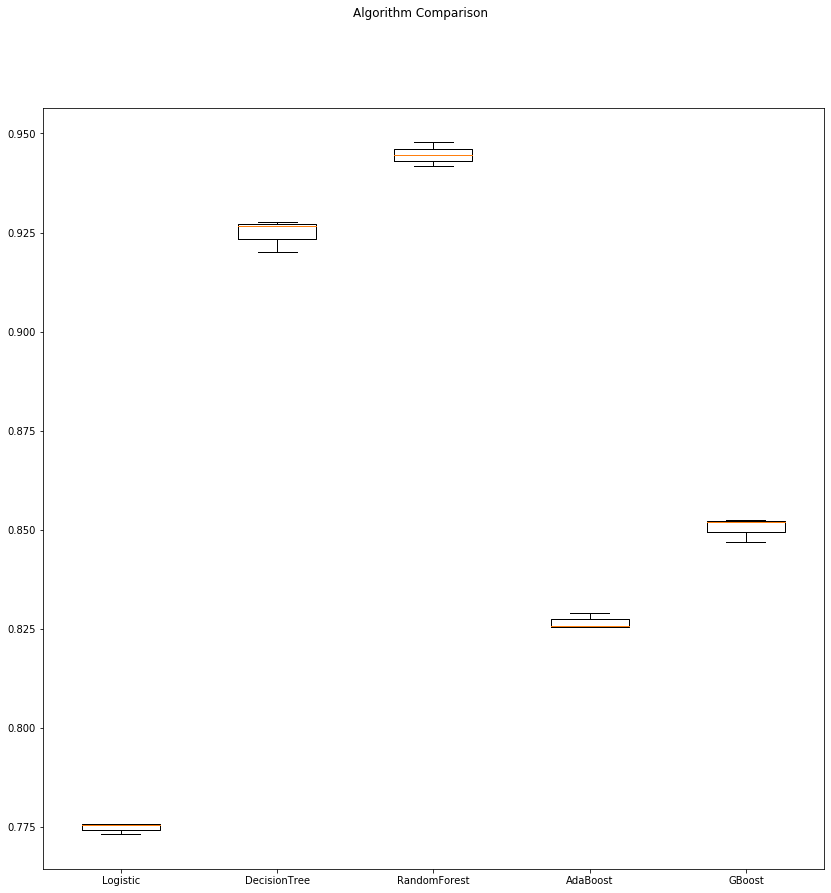

In [177]:
# evaluate each model in turn
plt.rcParams["figure.figsize"]=(14,14)
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X, y,cv=kfold, scoring='f1')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, 1-np.mean(cv_results),np.var(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [150]:
# There is a slight improvement in the recall but the precision have not shown any improvement

### SMOTE

In [188]:
from imblearn.over_sampling import SMOTE

In [189]:
y = df.Revenue
X = df.drop('Revenue', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27,stratify=y)

In [190]:
sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [191]:
# LogisticRegression
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# evaluating the model
print("Training Accuracy :", smote.score(X_train, y_train))
print("Testing Accuracy :", smote.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,smote_pred))

# confusion matrix
cm = confusion_matrix(y_test, smote_pred)
print(cm)

# classification report
cr = classification_report(y_test, smote_pred)
print(cr)

Training Accuracy : 0.8260452364633311
Testing Accuracy : 0.8610435252771019
f1 score tested: 0.6269956458635704
[[2753  374]
 [ 140  432]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3127
           1       0.54      0.76      0.63       572

    accuracy                           0.86      3699
   macro avg       0.74      0.82      0.77      3699
weighted avg       0.89      0.86      0.87      3699



In [192]:
# Decision Tree Classifier

smote = DecisionTreeClassifier().fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# evaluating the model
print("Training Accuracy :", smote.score(X_train, y_train))
print("Testing Accuracy :", smote.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,smote_pred))

# confusion matrix
cm = confusion_matrix(y_test, smote_pred)
print(cm)

# classification report
cr = classification_report(y_test, smote_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8580697485806975
f1 score tested: 0.5614035087719298
[[2838  289]
 [ 236  336]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3127
           1       0.54      0.59      0.56       572

    accuracy                           0.86      3699
   macro avg       0.73      0.75      0.74      3699
weighted avg       0.86      0.86      0.86      3699



In [193]:
# Random Forest Classifier

smote = RandomForestClassifier().fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# evaluating the model
print("Training Accuracy :", smote.score(X_train, y_train))
print("Testing Accuracy :", smote.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,smote_pred))

# confusion matrix
cm = confusion_matrix(y_test, smote_pred)
print(cm)

# classification report
cr = classification_report(y_test, smote_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8953771289537713
f1 score tested: 0.6666666666666666
[[2925  202]
 [ 185  387]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3127
           1       0.66      0.68      0.67       572

    accuracy                           0.90      3699
   macro avg       0.80      0.81      0.80      3699
weighted avg       0.90      0.90      0.90      3699



In [194]:
# Ada Boost Classifier

smote = AdaBoostClassifier().fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# evaluating the model
print("Training Accuracy :", smote.score(X_train, y_train))
print("Testing Accuracy :", smote.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,smote_pred))


# confusion matrix
cm = confusion_matrix(y_test, smote_pred)
print(cm)

# classification report
cr = classification_report(y_test, smote_pred)
print(cr)

Training Accuracy : 0.9239204934886909
Testing Accuracy : 0.8775344687753447
f1 score tested: 0.6246893123446562
[[2869  258]
 [ 195  377]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3127
           1       0.59      0.66      0.62       572

    accuracy                           0.88      3699
   macro avg       0.77      0.79      0.78      3699
weighted avg       0.88      0.88      0.88      3699



In [195]:
# Gradient Boost Classifier

smote = GradientBoostingClassifier().fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# evaluating the model
print("Training Accuracy :", smote.score(X_train, y_train))
print("Testing Accuracy :", smote.score(X_test, y_test))
print("f1 score tested:", f1_score(y_test,smote_pred))

# confusion matrix
cm = confusion_matrix(y_test, smote_pred)
print(cm)

# classification report
cr = classification_report(y_test, smote_pred)
print(cr)

Training Accuracy : 0.938793694311172
Testing Accuracy : 0.8959178156258448
f1 score tested: 0.688259109311741
[[2889  238]
 [ 147  425]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      3127
           1       0.64      0.74      0.69       572

    accuracy                           0.90      3699
   macro avg       0.80      0.83      0.81      3699
weighted avg       0.90      0.90      0.90      3699



### Validating the bias_variance error

In [198]:
sm = SMOTE(random_state=27, ratio=1.0)
X, y = sm.fit_sample(X, y)

Logistic: 0.188918 (0.000017)
DecisionTree: 0.089644 (0.000006)
RandomForest: 0.061715 (0.000000)
AdaBoost: 0.079090 (0.000002)
GBoost: 0.068223 (0.000005)


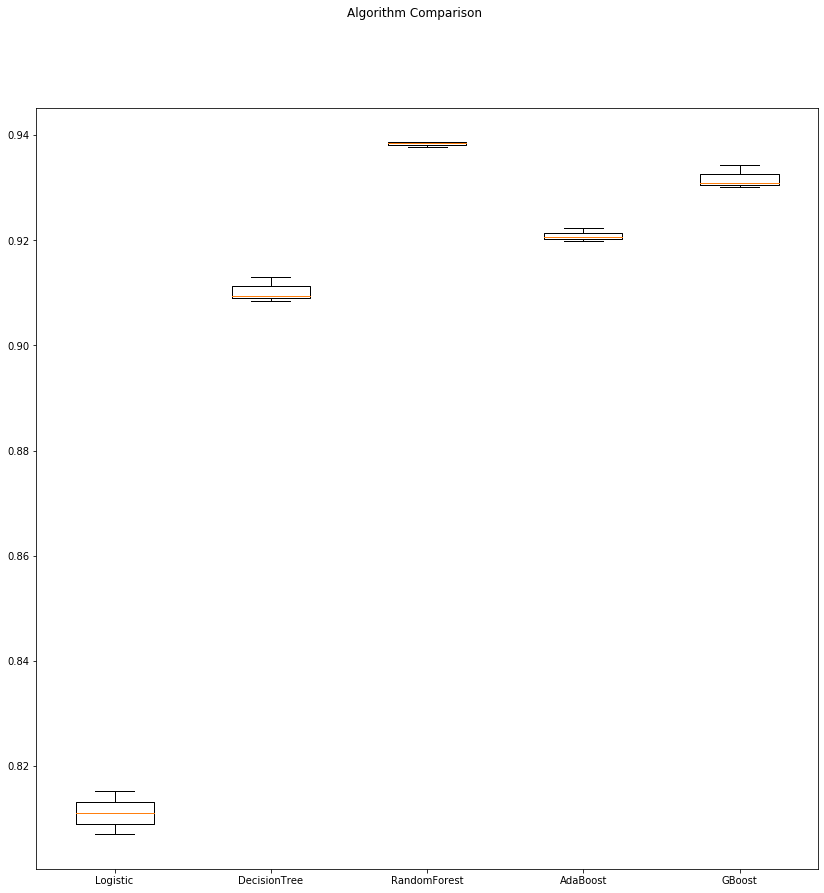

In [199]:
### Validating the bias_variance error

LR=LogisticRegression()
#KNN=KNeighborsClassifier()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
AB=AdaBoostClassifier()
GB=GradientBoostingClassifier()

models = []
models.append(('Logistic', LR))
#models.append(('KNN',KNN))
models.append(('DecisionTree',DT))
models.append(('RandomForest',RF))
models.append(('AdaBoost',AB))
models.append(('GBoost',GB))

# evaluate each model in turn
plt.rcParams["figure.figsize"]=(14,14)
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X, y,cv=kfold, scoring='f1')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, 1-np.mean(cv_results),np.var(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()